In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
df_train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")


In [3]:

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df_train["YrSold"].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

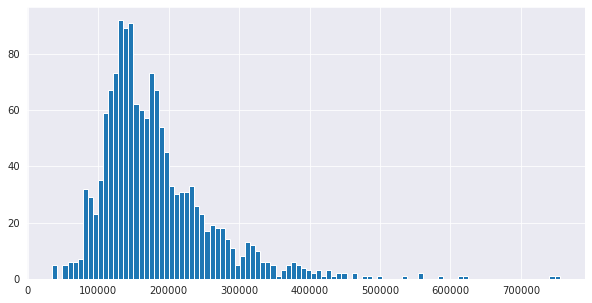

In [6]:

%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')


df_train["SalePrice"].hist(bins = 100, figsize = (10,5))
plt.show()

In [7]:
Id_train = df_train["Id"]
Id_test = df_test["Id"]

df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis =1, inplace = True)
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


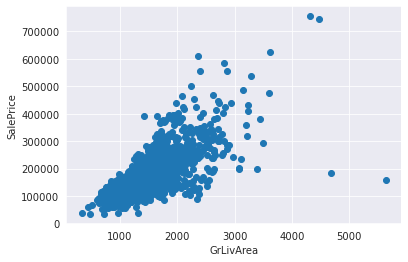

In [8]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [9]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

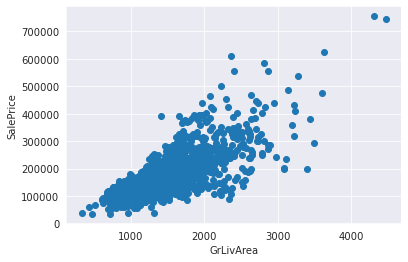

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

mu = 180932.92 , sigma = 79467.79


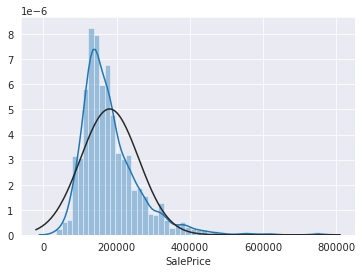

In [11]:
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(df_train['SalePrice'] , fit=norm)

mu, sigma = norm.fit(df_train["SalePrice"] )

print("mu = {:.2f} , sigma = {:.2f}".format(mu,sigma))


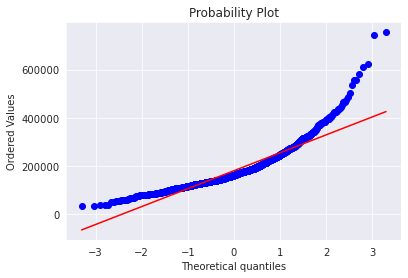

In [12]:
#QQ plot
fig = plt.figure()
res = stats.probplot(df_train["SalePrice"], plot= plt)
plt.show()

mu = 12.02 , sigma = 0.40


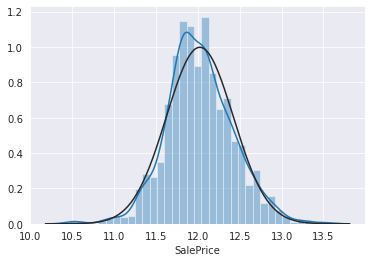

In [13]:
df_train["SalePrice"] = np.log(df_train["SalePrice"])

sns.distplot(df_train['SalePrice'] , fit=norm)

mu, sigma = norm.fit(df_train["SalePrice"] )

print("mu = {:.2f} , sigma = {:.2f}".format(mu,sigma))

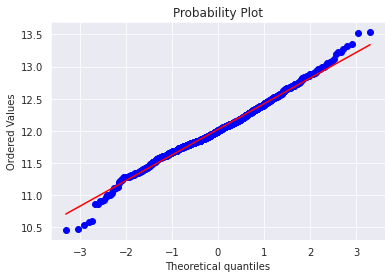

In [14]:
#QQ plot
fig = plt.figure()
res = stats.probplot(df_train["SalePrice"], plot= plt)
plt.show()


In [15]:
n_train = df_train.shape[0]
n_test = df_test.shape[0]
y_train = df_train["SalePrice"]
df = pd.concat((df_train, df_test)).reset_index(drop = True)
df.drop(["SalePrice"], axis = 1, inplace = True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2913,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2914,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2915,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [16]:
missing_vl_ratio = df.isna().mean().round(4) * 100
missing_vl_ratio = missing_vl_ratio.drop(missing_vl_ratio[missing_vl_ratio == 0].index).sort_values(ascending=False)[:30]
dataframe_miss=pd.DataFrame(missing_vl_ratio, columns=['missing ratio'])
dataframe_miss.head(80)

,missing ratio
PoolQC,99.69
MiscFeature,96.40
Alley,93.21
Fence,80.43
FireplaceQu,48.68
LotFrontage,16.66
GarageFinish,5.45
GarageYrBlt,5.45
GarageQual,5.45
GarageCond,5.45


In [17]:
for item in ('PoolQC','MiscFeature', 'Alley', 'Fence', 'FireplaceQu'):
    df[item] = df[item].fillna('None')

In [18]:
df["LotFrontage"] = df.groupby("Neighborhood").transform(lambda x: x.fillna(x.median()))

In [19]:
for item in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure','MSSubClass', 'BsmtFinType1', 'BsmtFinType2'):
    df[item] = df[item].fillna('None')

In [20]:
for item in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[item] = df[item].fillna(0)

In [21]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])


In [22]:
df["Utilities"].value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [23]:
df = df.drop(['Utilities'], axis=1)

In [24]:
df["Functional"].value_counts()

Typ     2715
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [25]:
df["Functional"] = df["Functional"].fillna("Typ") #Check data disc !


In [26]:
print(df["Electrical"].mode())
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0]) #most common 

0    SBrkr
dtype: object


In [27]:
print(df["KitchenQual"].mode())
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0]) #most common 
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

0    TA
dtype: object


In [28]:
missing_vl_ratio = df.isna().mean().round(4) * 100
missing_vl_ratio = missing_vl_ratio.drop(missing_vl_ratio[missing_vl_ratio == 0].index).sort_values(ascending=False)[:30]
dataframe_miss=pd.DataFrame(missing_vl_ratio, columns=['missing ratio'])
dataframe_miss.head(80)

,missing ratio


In [29]:
print(df["MSSubClass"].value_counts())
df["MSSubClass"] = df["MSSubClass"].apply(str)

print(df["OverallCond"].value_counts())
df["OverallCond"] = df["OverallCond"].astype(str)


20     1079
60      573
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64
5    1643
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64


In [30]:
df["YrSold"].value_counts()
df["YrSold"] = df["YrSold"].astype(str)
df["MoSold"] = df["MoSold"].astype(str)



In [31]:
from sklearn.preprocessing import LabelEncoder
items = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')


for item in items:
    labelencoder = LabelEncoder()
    df[item] = labelencoder.fit_transform(df[item].values)
 
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,RL,60.0,8450,1,1,3,Lvl,Inside,0,...,0,0,3,4,None,0,4,2,WD,Normal
1,5,RL,20.0,9600,1,1,3,Lvl,FR2,0,...,0,0,3,4,None,0,7,1,WD,Normal
2,10,RL,60.0,11250,1,1,0,Lvl,Inside,0,...,0,0,3,4,None,0,11,2,WD,Normal
3,11,RL,70.0,9550,1,1,0,Lvl,Corner,0,...,0,0,3,4,None,0,4,0,WD,Abnorml
4,10,RL,60.0,14260,1,1,0,Lvl,FR2,0,...,0,0,3,4,None,0,3,2,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,2,RM,160.0,1936,1,1,3,Lvl,Inside,0,...,0,0,3,4,None,0,8,0,WD,Normal
2913,2,RM,160.0,1894,1,1,3,Lvl,Inside,0,...,0,0,3,4,None,0,6,0,WD,Abnorml
2914,5,RL,20.0,20000,1,1,3,Lvl,Inside,0,...,0,0,3,4,None,0,11,0,WD,Abnorml
2915,14,RL,85.0,10441,1,1,3,Lvl,Inside,0,...,0,0,3,2,Shed,700,9,0,WD,Normal


In [32]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']


In [33]:
from scipy.special import boxcox1p

numeric_feats = df.dtypes[df.dtypes != "object"].index
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewed_features = skewness.index
lam = 0.15
for feature in skewed_features:
    df[feature] = boxcox1p(df[feature], lam)

In [34]:
df = pd.get_dummies(df)
df

df_train = df[:n_train]
df_test = df[n_train:]

In [35]:
df

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.885846,5.684507,19.212182,0.730463,0.730463,1.540963,0.000000,2.440268,1.820334,14.187527,...,0,0,0,1,0,0,0,0,1,0
1,2.055642,3.858807,19.712205,0.730463,0.730463,1.540963,0.000000,2.259674,2.440268,14.145138,...,0,0,0,1,0,0,0,0,1,0
2,2.885846,5.684507,20.347241,0.730463,0.730463,0.000000,0.000000,2.440268,1.820334,14.184404,...,0,0,0,1,0,0,0,0,1,0
3,3.011340,5.968981,19.691553,0.730463,0.730463,0.000000,0.000000,2.440268,1.820334,14.047529,...,0,0,0,1,1,0,0,0,0,0
4,2.885846,5.684507,21.325160,0.730463,0.730463,0.000000,0.000000,2.602594,1.820334,14.182841,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,1.194318,7.620056,14.081426,0.730463,0.730463,1.540963,0.000000,1.820334,2.259674,14.135652,...,0,0,0,1,0,0,0,0,1,0
2913,1.194318,7.620056,14.013314,0.730463,0.730463,1.540963,0.000000,1.820334,1.820334,14.135652,...,0,0,0,1,1,0,0,0,0,0
2914,2.055642,3.858807,22.782058,0.730463,0.730463,1.540963,0.000000,2.055642,2.259674,14.119786,...,0,0,0,1,1,0,0,0,0,0
2915,3.340760,6.337529,20.046557,0.730463,0.730463,1.540963,0.000000,2.055642,1.820334,14.170316,...,0,0,0,1,0,0,0,0,1,0


In [36]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [37]:
n_folds = 5 # number of folds
def get_cv_scores(model, X, y, print_scores=True):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X) # create folds
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf)) # get rmse
    if print_scores:
        print(f'Root mean squared error: {rmse.mean():.3f} ({rmse.std():.3f})')
    return [rmse]

In [38]:
lasso_model = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
rf = RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgb_model = xgb.XGBRegressor()
lgb_model = lgb.LGBMRegressor()
for model in [lasso_model, rf, gbr, xgb_model, lgb_model]:
    print(str(model))
    get_cv_scores(model, df_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lasso', Lasso(alpha=0.0005, random_state=1))])
Root mean squared error: 0.111 (0.007)
RandomForestRegressor()
Root mean squared error: 0.137 (0.004)
GradientBoostingRegressor()
Root mean squared error: 0.121 (0.007)
XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
Root mean squared error: 0.130 (0.010)
LGBMRegressor()
Root mean squared error: 0.127 (0.005)

In [39]:
class WeightedAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models, weights):
        self.models = models
        self.weights = weights
        assert sum(self.weights)==1
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)
        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.sum(predictions*self.weights, axis=1)

In [40]:
weighted_average_model = WeightedAveragedModels([gbr, lasso_model, xgb_model], [0.3, 0.45, 0.25])
get_cv_scores(weighted_average_model, df_train, y_train);


Root mean squared error: 0.110 (0.008)


In [41]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [42]:
weighted_average_model.fit(df_train.values, y_train)
weighted_train_pred = weighted_average_model.predict(df_train.values)
weighted_pred = np.expm1(weighted_average_model.predict(df_test.values))
print(rmsle(y_train, weighted_train_pred))

0.0680847253857143


In [43]:
sub = pd.DataFrame()
sub['Id'] = Id_test
sub['SalePrice'] = weighted_pred
sub.to_csv('submission.csv',index=False)